# 1)K-means clustering algorithm implementation

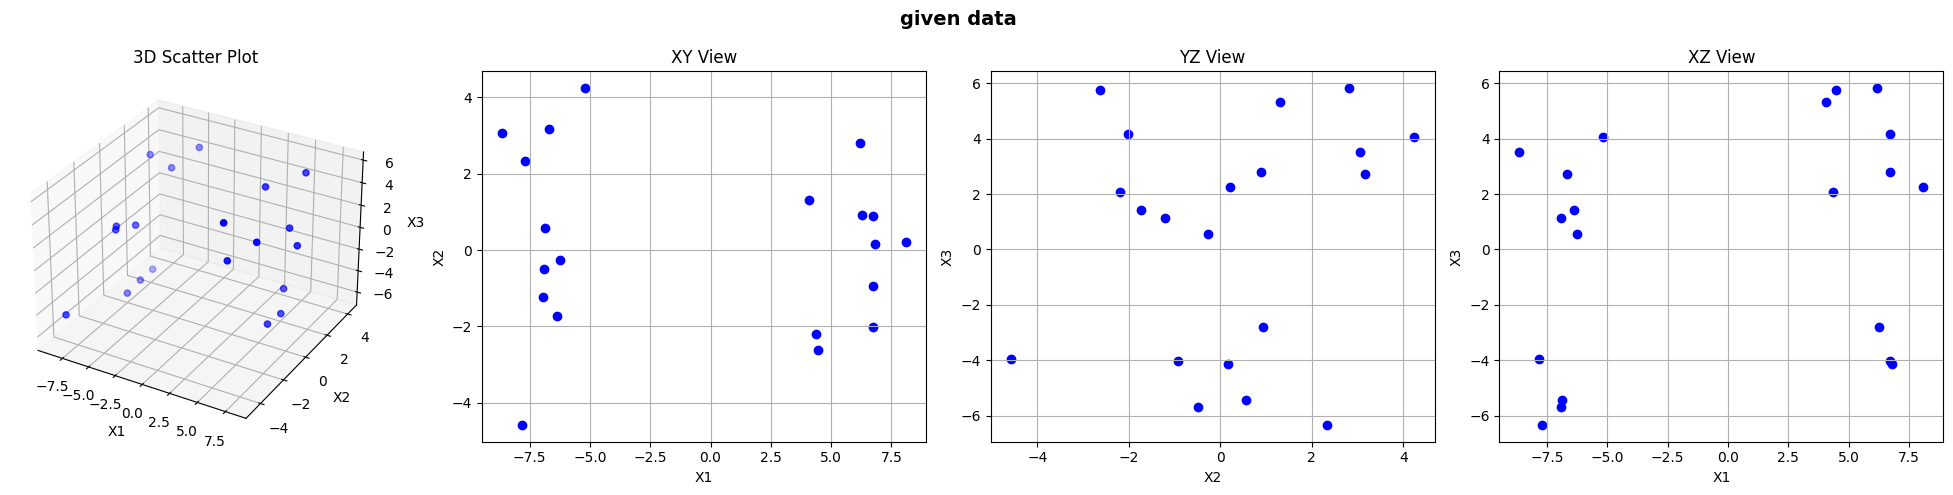

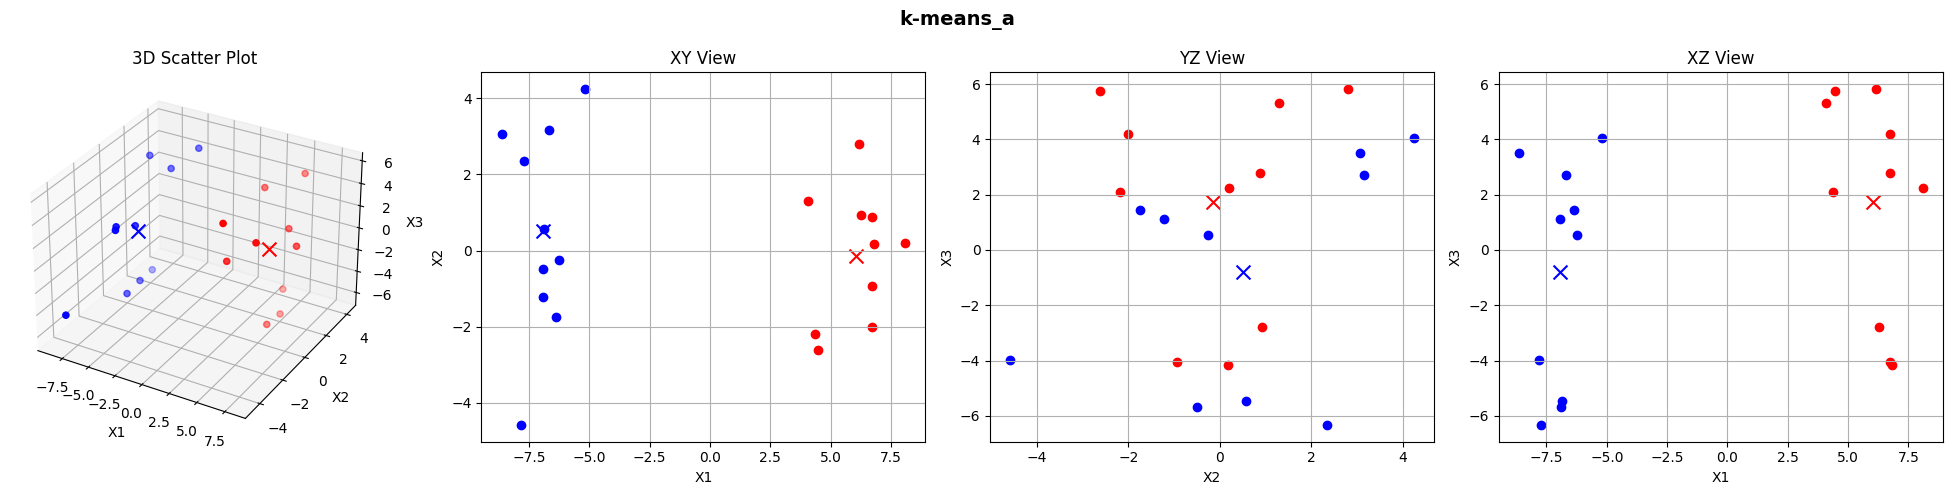

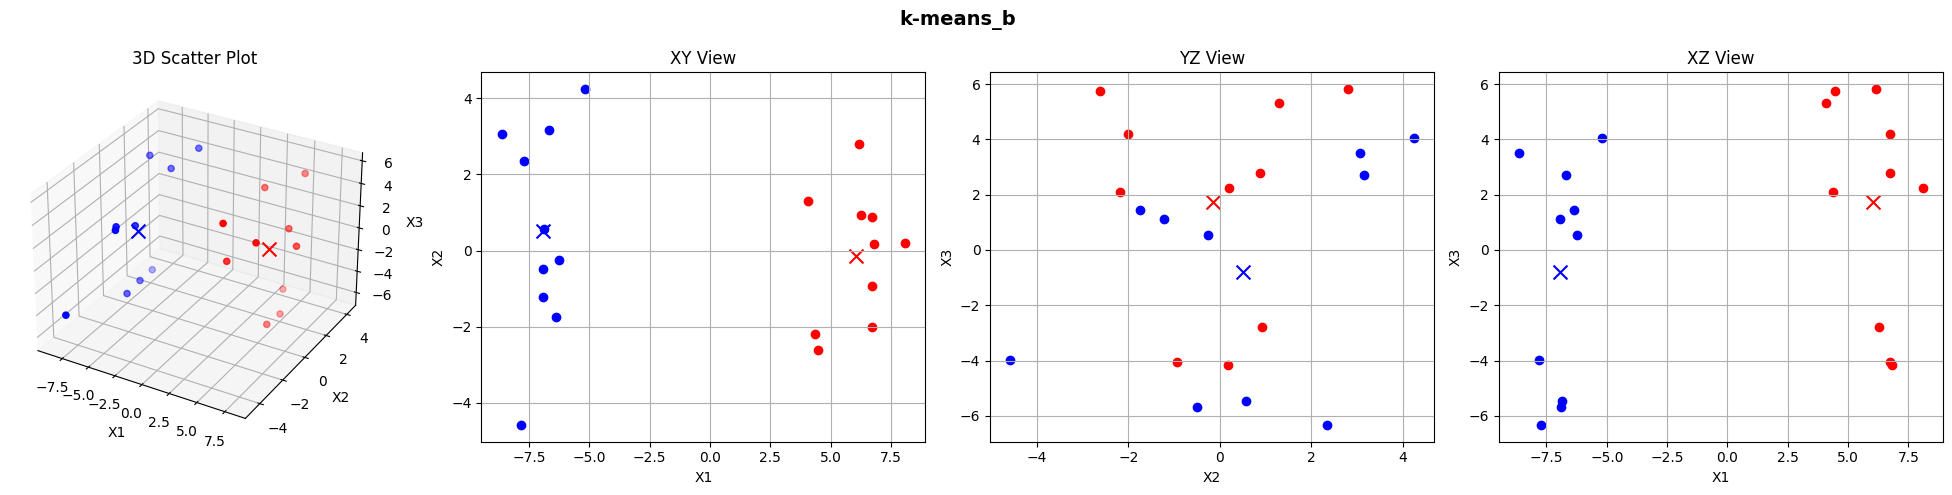

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_with_views(data,main_label='given data',centroids=None,colors=['b','r','k'],):
    labels=['3D Scatter Plot','XY View','YZ View','XZ View']
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(1, 4, 1, projection='3d')
    ax2 = fig.add_subplot(1, 4, 2)
    ax3 = fig.add_subplot(1, 4, 3)
    ax4 = fig.add_subplot(1, 4, 4)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
     # 3D Scatter Plot
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('X3')
    ax1.set_title(labels[0])
    # XY View
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_title(labels[1])
     # YZ View
    ax3.set_xlabel('X2')
    ax3.set_ylabel('X3')
    ax3.set_title(labels[2])
     # XZ View
    ax4.set_xlabel('X1')
    ax4.set_ylabel('X3')
    ax4.set_title(labels[3])

    for i, d in enumerate(data):
        d=np.array(d)
        ax1.scatter(d[:, 0], d[:, 1], d[:, 2], c=colors[i], marker='o')
        ax2.scatter(d[:, 0], d[:, 1], c=colors[i], marker='o')
        ax3.scatter(d[:, 1], d[:, 2], c=colors[i], marker='o')
        ax4.scatter(d[:, 0], d[:, 2], c=colors[i], marker='o')
    if(centroids!=None):
        for i, centroid in enumerate(centroids):
            ax1.scatter(centroid[0], centroid[1], centroid[2], c=colors[i], marker='x', s=100)
            ax2.scatter(centroid[0], centroid[1], c=colors[i], marker='x', s=100)
            ax3.scatter(centroid[1], centroid[2], c=colors[i], marker='x', s=100)
            ax4.scatter(centroid[0], centroid[2], c=colors[i], marker='x', s=100)
    # plt.tight_layout()
    fig.suptitle(main_label, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def k_means(data, k, centroids, max_iterations=100):
    centroids_history = [centroids.copy()]
    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)
        
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters]
        
        if np.array_equal(new_centroids, centroids):
            break
        
        centroids = new_centroids
        centroids_history.append(centroids.copy())
    # print("clusters:",end='')
    # print(clusters)
    # print("\n\ncentroids history:",end='')
    # print(centroids_history)
    # print("\n\niterations:",end='')
    # print(len(centroids_history) - 1)
    return clusters, centroids_history, len(centroids_history) - 1

# Given data
data = np.array([
    [-7.82, -4.58, -3.97], [-6.68, 3.16, 2.71], [4.36, -2.19, 2.09], [6.72, 0.88, 2.80],
    [-8.64, 3.06, 3.50], [-6.87, 0.57, -5.45], [4.47, -2.62, 5.76], [6.73, -2.01, 4.18],
    [-7.71, 2.34, -6.33], [-6.91, -0.49, -5.68], [6.18, 2.81, 5.82], [6.72, -0.93, -4.04],
    [-6.25, -0.26, 0.56], [-6.94, -1.22, 1.13], [8.09, 0.20, 2.25], [6.81, 0.17, -4.15],
    [-5.19, 4.24, 4.04], [-6.38, -1.74, 1.43], [4.08, 1.30, 5.33], [6.27, 0.93, -2.78]
])

# Initialization values for k-means
K = 2
initial_centroids_a = np.array([[0, 0, 0], [1, 1, -1]])
initial_centroids_b = np.array([[-1, 1, -1], [1, 1, 1]])
# Plot initial input data
plot_3d_with_views([data])

# Run k-means algorithm
clusters_a, centroids_history_a, iterations_a = k_means(data, K, initial_centroids_a)
clusters_b, centroids_history_b, iterations_b = k_means(data, K, initial_centroids_b)
# Plot k-means results
plot_3d_with_views(clusters_a,'k-means_a',centroids_history_a[-1])
plot_3d_with_views(clusters_b,'k-means_b',centroids_history_a[-1])





In [2]:
print(f'number of iterations in k_mean part a: {iterations_a}')
print(f'number of iterations in k_mean part b: {iterations_b}')

number of iterations in k_mean part a: 2
number of iterations in k_mean part b: 1


# 2)Two-variant normal mixture

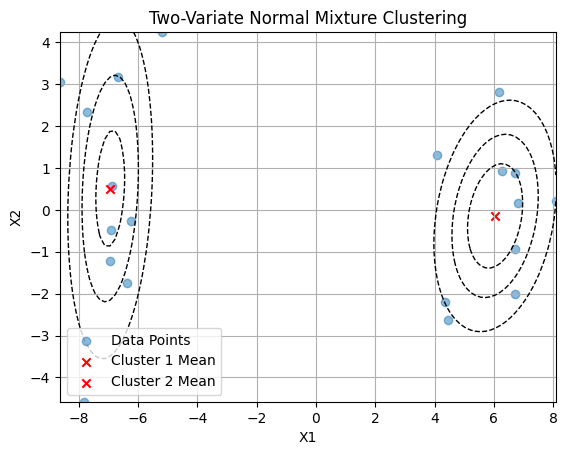

In [3]:
from scipy.stats import multivariate_normal
def two_variate_normal_mixture(data, K, max_iterations=100, tolerance=1e-4):
    n, d = data.shape
    
    # Initialize parameters randomly
    np.random.seed(0)
    means = [np.random.randn(d) for _ in range(K)]
    covariances = [np.eye(d) for _ in range(K)]
    mixing_coefficients = np.ones(K) / K
    
    # EM algorithm
    for iteration in range(max_iterations):
        # Expectation step
        responsibilities = np.zeros((n, K))
        for k in range(K):
            responsibilities[:, k] = mixing_coefficients[k] * multivariate_normal.pdf(data, mean=means[k], cov=covariances[k])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # Maximization step
        new_means = []
        new_covariances = []
        new_mixing_coefficients = np.zeros(K)
        for k in range(K):
            Nk = responsibilities[:, k].sum()
            new_means.append((data * responsibilities[:, k][:, np.newaxis]).sum(axis=0) / Nk)
            diff = data - new_means[-1]
            new_covariances.append(np.dot(responsibilities[:, k] * diff.T, diff) / Nk + 1e-5 * np.eye(d))
            new_mixing_coefficients[k] = Nk / n
        
        # Check for convergence
        delta = max(np.linalg.norm(new_means[k] - means[k]) for k in range(K))
        if delta < tolerance:
            break
        
        # Update parameters
        means = new_means
        covariances = new_covariances
        mixing_coefficients = new_mixing_coefficients
    
    return means, covariances, mixing_coefficients

def plot_clusters(data, means, covariances, title=""):
    n, d = data.shape
    K = len(means)
    
    # Plot data points
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data Points')
    
    # Plot clusters
    for k in range(K):
        x, y = np.mgrid[min(data[:, 0]):max(data[:, 0]):100j, min(data[:, 1]):max(data[:, 1]):100j]
        pos = np.dstack((x, y))
        plt.contour(x, y, multivariate_normal.pdf(pos, mean=means[k], cov=covariances[k]), levels=3, linewidths=1, linestyles='dashed', colors='k')
        plt.scatter(means[k][0], means[k][1], c='r', marker='x', label=f'Cluster {k+1} Mean')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Given data


# Number of clusters
K = 2
mv_data=np.array(data[:, :2])
# Compute maximum likelihood values of parameters
means, covariances, mixing_coefficients = two_variate_normal_mixture(mv_data, K)

# Plot results
plot_clusters(mv_data, means, covariances, title="Two-Variate Normal Mixture Clustering")

# 3)Principal complonent analysis implementation

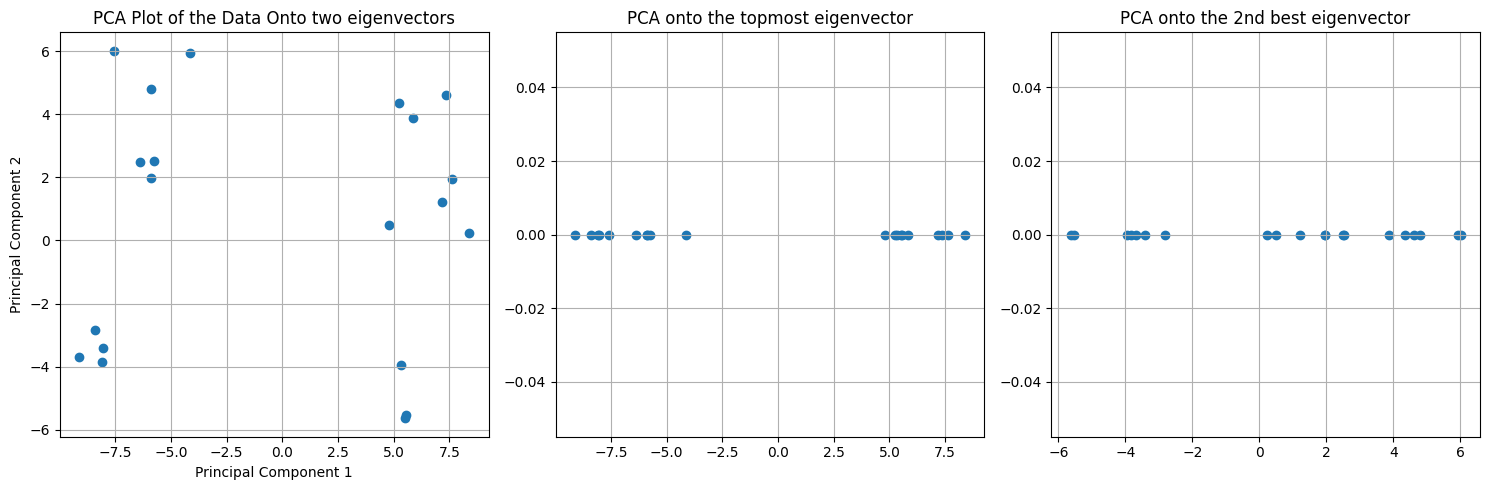

In [4]:
from scipy.linalg import svd
# Use PCA to reduce dimensionality to 2 components
U, S, Vt = svd(data, full_matrices=False)
data_2d = np.dot(data, Vt[:2].T)

# Plot the graph
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax1.scatter(data_2d[:, 0], data_2d[:, 1])
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA Plot of the Data Onto two eigenvectors')
ax2.scatter(data_2d[:, 0],np.zeros_like(data_2d[:, 0]))
ax2.set_title('PCA onto the topmost eigenvector')
ax3.scatter(data_2d[:, 1],np.zeros_like(data_2d[:, 1]))
ax3.set_title('PCA onto the 2nd best eigenvector')
plt.tight_layout()
plt.show()